# Regression Model Valdation

In this notebook, we will:
- Manually perform a train-test split
- Perform K-Fold cross-validation

We will use the **Auto MPG** dataset and avoid automated splitting tools like `train_test_split` or `cross_val_score`.

This approach gives you more control over data partitioning.

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils import shuffle 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,ridge_regression,RidgeCV,LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score


In [478]:
# data loading

df = pd.read_csv("./data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## EDA and data cleaning 

In [479]:
# shape
df.shape

(392, 9)

In [480]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [481]:

# Drop rows with missing values
df.dropna(inplace=True)

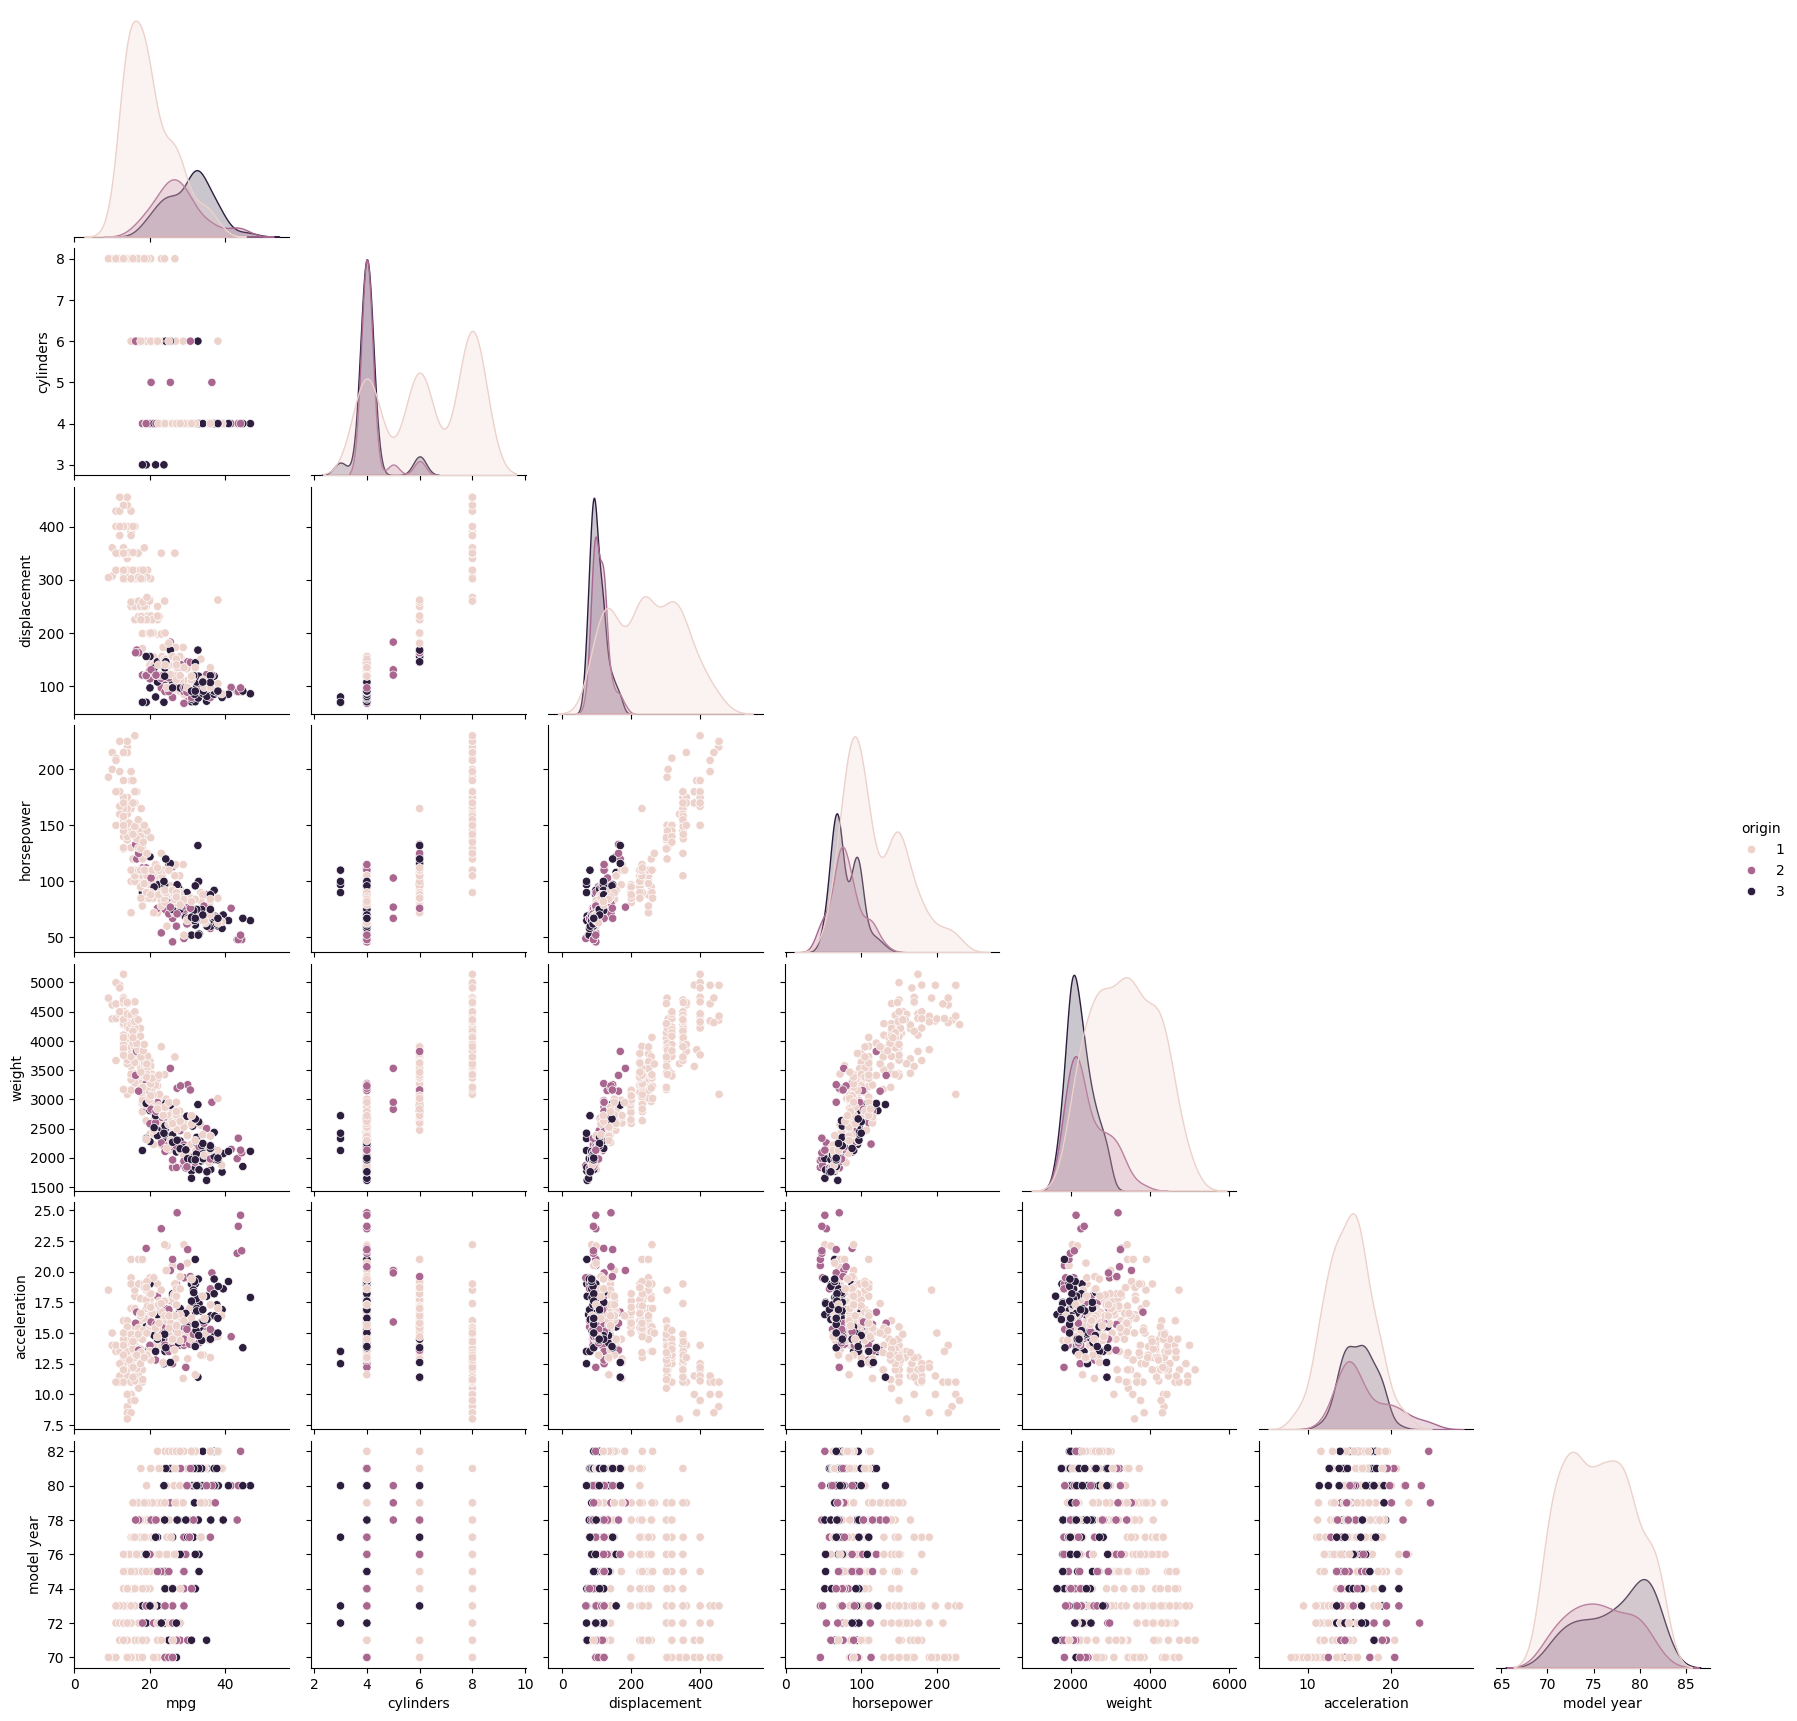

In [482]:
# pair plot
sns.pairplot(df,corner=True,hue="origin")


### Feature Selection

In [483]:
# set indipedent and target variables
X = df[["displacement","horsepower","weight"]]
y = df["mpg"]


## Manual Train-Test Split

Split the dataset manually into 80% training and 20% testing using array slicing.

In [484]:
# get the index

split_ratio = 0.8
split_index = int(len(X)*split_ratio)

In [485]:
# shuffle data
X,y = shuffle(X,y,random_state=42)

In [486]:
# split the data

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


# Build And train the model

In [487]:
# model defination
model = LinearRegression()

In [488]:
# model training 
model.fit(X_train,y_train)


LinearRegression()

In [489]:
# make predictions
y_pred = model.predict(X_test)



In [490]:
# y_pred training
y_pred_train = model.predict(X_train)

In [491]:
# MAE training
mean_absolute_error(y_train,y_pred_train)

3.2813863744319915

In [492]:
# MAE test

mean_absolute_error(y_test,y_pred)


2.980406970449089

## In Sklearn

In [502]:
# train test split in sklearn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)


In [503]:
model = LinearRegression()

In [504]:
# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [505]:
# make predictions
y_pred = model.predict(X_test)


In [506]:
# MAE
mean_absolute_error(y_test,y_pred)

3.0093676547640187

## Cross-Validation using `cross_val_score`

We can also use scikit-learn's `cross_val_score` for automated K-Fold cross-validation.

In [509]:
scores = cross_val_score(model,X,y,cv=8,scoring="neg_mean_absolute_error")

In [511]:
# MAE
np.mean(-scores)

np.float64(3.267426505696459)